# The 1D Cahn-Hilliard equation

In [1]:
using Plots
using ForwardDiff
using SkeelBerzins
using DifferentialEquations

import PyPlot
pythonplot()

InitError: Error trying to display an error.

## The Cahn-Hilliard equation in mixed formulation

$$
\partial_t u = -\partial_x J \\
J = M \partial_x \mu \\
\mu = \frac{dF}{du} - \gamma \partial_x (\partial_x u)
$$

$$
\begin{pmatrix}
\partial_t u \\ 0
\end{pmatrix}

=

\begin{pmatrix}
-M \partial_x \mu \\
\gamma \partial_x u
\end{pmatrix}_x

+

\begin{pmatrix}
0 \\
\mu - \frac{dF}{du}
\end{pmatrix}
$$

In [2]:
F = (u) -> 0.25 * u^4 - 0.5 * u^2
dFdu = (u) -> ForwardDiff.derivative(F, u)  # u^3 - u

#11 (generic function with 1 method)

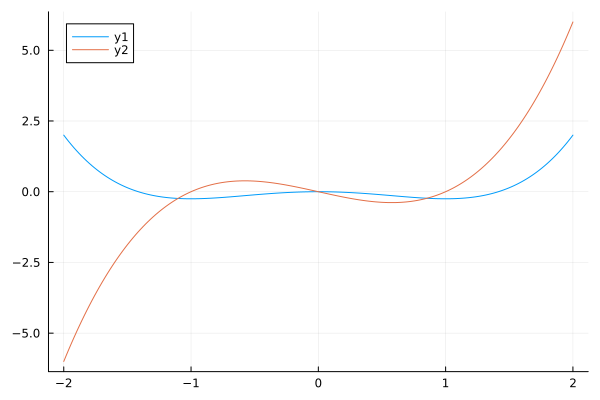

In [3]:
u = range(-2, 2, 200)

plot(u, F.(u))
plot!(u, dFdu.(u))

In [4]:
# Parameters of the problem

M = 1.
gamma = 1.0;

In [5]:
# Define the mesh

N_x = 64

L = 1
T = 1

x_mesh = collect(range(0, L; length=N_x));

In [6]:
function ch1d_pde(x, t, psi, dpsidx)

    chem_pot = dFdu.(psi[1])

    c = SVector(1, 0)

    f = SVector(-M * dpsidx[2], gamma * dpsidx[1])

    s = SVector(0, psi[2] - chem_pot)

    return c, f, s
end

ch1d_pde (generic function with 1 method)

In [7]:
function bd_func(xl, psil, xr, psir, t)

    # Neummann-0 for both component and sides.
    pl = SVector(0, 0)
    ql = SVector(1, 1)

    pr = SVector(0, 0)
    qr = SVector(1, 1)

    return pl, ql, pr, qr
end

bd_func (generic function with 1 method)

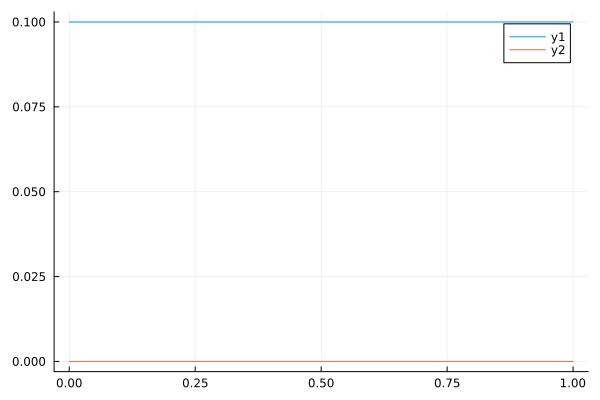

In [8]:
function ic_func(x)
    # random
    # return SVector(0. * x .+ 0.01 * randn(size(x)), 0 * x)
    # return SVector(cos.(2pi * x), 0 * x)
    return SVector(0.1 .+ 0. * x, 0 * x)
end

plot(x_mesh, ic_func(x_mesh))

In [9]:
params_diffEq = SkeelBerzins.Params(; solver=:DiffEq)

t_span = (0, 1)

pb = pdepe(0, ch1d_pde, ic_func, bd_func, x_mesh, t_span; params=params_diffEq)

SkeelBerzins.ProblemDefinition{0, 2, false, Vector{Float64}, Int64, Int64, Float64, typeof(ch1d_pde), typeof(ic_func), typeof(bd_func)}(2, 64, [0.0, 0.015873015873015872, 0.031746031746031744, 0.047619047619047616, 0.06349206349206349, 0.07936507936507936, 0.09523809523809523, 0.1111111111111111, 0.12698412698412698, 0.14285714285714285  …  0.8571428571428571, 0.873015873015873, 0.8888888888888888, 0.9047619047619048, 0.9206349206349206, 0.9365079365079365, 0.9523809523809523, 0.9682539682539683, 0.9841269841269841, 1.0], (0, 1), false, 0, sparse([1, 2, 3, 4, 1, 2, 3, 4, 1, 2  …  127, 128, 125, 126, 127, 128, 125, 126, 127, 128], [1, 1, 1, 1, 2, 2, 2, 2, 3, 3  …  126, 126, 127, 127, 127, 127, 128, 128, 128, 128], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 128, 128), [0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0  …  0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0], [0.007936507936507936, 0.023809523809523808, 0.039682539

In [10]:
problem = DifferentialEquations.ODEProblem(pb)
sol_diffEq = DifferentialEquations.solve(problem, Rodas4P())
sol_reshaped_diffEq = reshape(sol_diffEq, pb);

┌ Warning: dt(2.220446049250313e-16) <= dtmin(2.220446049250313e-16) at t=1.722847681350177e-10, and step error estimate = 2.029320186419785. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /home/tom/.julia/packages/SciMLBase/8XHkk/src/integrator_interface.jl:599


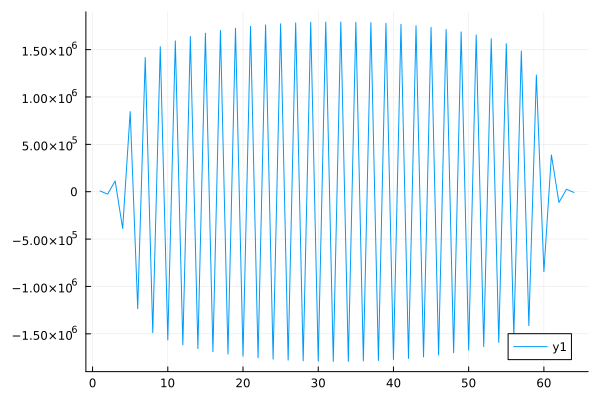

In [11]:
plot(sol_reshaped_diffEq.u[end][1, :])

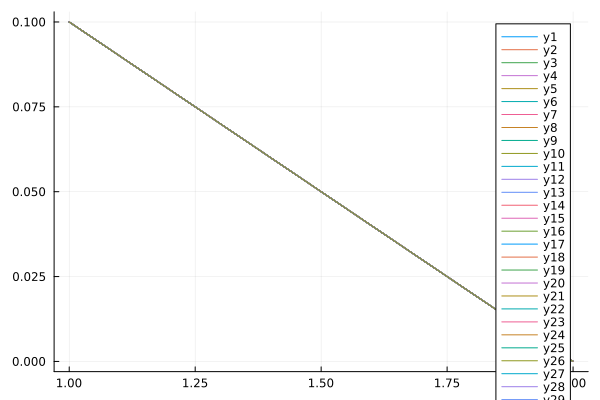

In [12]:
sol_euler = pdepe(0, ch1d_pde, ic_func, bd_func, x_mesh, t_span);

plot(sol_euler.u[begin])

In [13]:
Matrix(sol_euler.u)

MethodError: MethodError: no method matching (Matrix)(::Vector{Matrix{Float64}})

Closest candidates are:
  (Array{T, N} where T)(::AbstractArray{S, N}) where {S, N}
   @ Core boot.jl:498
  (Matrix)(!Matched::UndefInitializer, !Matched::Integer, !Matched::Integer)
   @ Base baseext.jl:33
  (Matrix)(!Matched::BandedMatrices.BandedEigenvectors)
   @ BandedMatrices ~/.julia/packages/BandedMatrices/FIZr3/src/symbanded/bandedeigen.jl:195
  ...


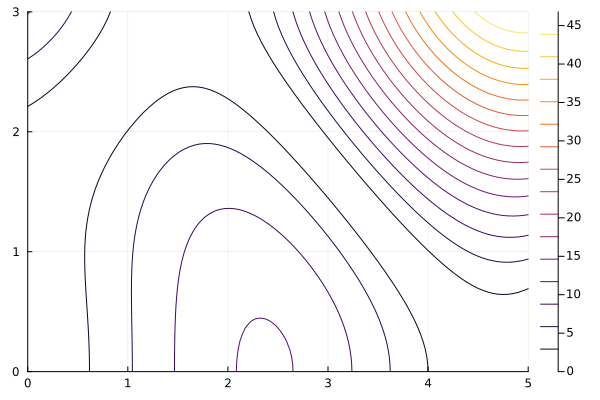

In [14]:
f(x, y) = (3x + y^2) * abs(sin(x) + cos(y))

x = range(0, 5, length=100)
y = range(0, 3, length=50)
z = @. f(x', y)
contour(x, y, z)